In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=df=pd.read_csv('/content/framingham.csv')
dataset.shape

(4238, 16)

In [ ]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
std_corr = dataset.corr()
print(std_corr['TenYearCHD'].sort_values(ascending = False))

TenYearCHD         1.000000
age                0.225256
sysBP              0.216429
prevalentHyp       0.177603
diaBP              0.145299
glucose            0.125544
diabetes           0.097317
male               0.088428
BPMeds             0.087489
totChol            0.082184
BMI                0.075192
prevalentStroke    0.061810
cigsPerDay         0.057884
heartRate          0.022913
currentSmoker      0.019456
education         -0.054059
Name: TenYearCHD, dtype: float64


In [ ]:
X=dataset.drop(['education','TenYearCHD'], axis=1)
y=dataset['TenYearCHD']

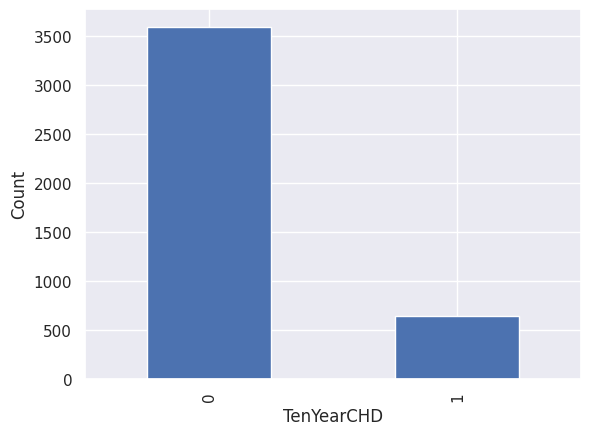

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [ ]:
sns.set()
chd_plot=dataset['TenYearCHD'].value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()
y.value_counts()

In [ ]:
#Splitting the data into train/test sets
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.isnull().any()

male               False
age                False
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
dtype: bool

In [ ]:
#Cleaning the training data
X_train_clean=X_train
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')
X_train_clean['BPMeds']=si.fit_transform(X_train_clean[['BPMeds']])
si2=SimpleImputer(strategy='mean')
X_train_clean=pd.DataFrame(si2.fit_transform(X_train_clean))

X_train_clean.isnull().any().any()

False

In [ ]:
#Transforming the test data
X_valid_clean=X_valid
X_valid_clean['BPMeds']=si.transform(X_valid_clean[['BPMeds']])
X_valid_clean=pd.DataFrame(si2.transform(X_valid_clean))

X_valid_clean.isnull().any().any()

False

In [ ]:
X_train_clean.columns= X.columns
X_valid_clean.columns= X.columns
X_train_clean.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.0,63.0,1.0,10.0,0.0,0.0,0.0,1.0,240.0,146.0,84.0,30.48,75.0,120.0
1,1.0,52.0,1.0,30.0,0.0,0.0,0.0,0.0,223.0,133.0,82.0,21.18,66.0,77.0
2,1.0,38.0,1.0,20.0,0.0,0.0,0.0,0.0,279.0,124.0,87.0,26.68,76.0,75.0
3,0.0,49.0,0.0,0.0,1.0,0.0,1.0,0.0,300.0,131.0,88.0,26.85,70.0,73.0
4,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0,110.0,70.0,22.98,85.0,85.0


In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=pd.DataFrame(sc.fit_transform(X_train_clean))
X_valid_scaled=pd.DataFrame(sc.transform(X_train_clean))

X_train_scaled.columns= X.columns
X_valid_scaled.columns= X.columns

X_train_scaled.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1.159482,1.571974,0.997643,0.077298,-0.170716,-0.08265,-0.668478,6.055301,0.065134,0.634003,0.104084,1.142690,-0.074013,1.665258
1,1.159482,0.287795,0.997643,1.757126,-0.170716,-0.08265,-0.668478,-0.165145,-0.323552,0.039328,-0.063897,-1.130663,-0.816362,-0.222288
2,1.159482,-1.346614,0.997643,0.917212,-0.170716,-0.08265,-0.668478,-0.165145,0.956827,-0.372370,0.356054,0.213793,0.008470,-0.310081
3,-0.862454,-0.062435,-1.002363,-0.762616,5.857687,-0.08265,1.495935,-0.165145,1.436969,-0.052161,0.440045,0.255349,-0.486430,-0.397874
4,-0.862454,-1.113127,-1.002363,-0.762616,-0.170716,-0.08265,-0.668478,-0.165145,-0.575055,-1.012789,-1.071780,-0.690659,0.750819,0.128883


In [ ]:
#Funtion to build and visualise a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
def my_confusion_matrix(y_test, y_pred, plt_title, accuracy_title):
    cm=confusion_matrix(y_test, y_pred)
    print(f'{accuracy_title} accuracy score:', '{:.2%}'.format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='g', cbar=False, cmap='Blues')
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(plt_title)
    plt.show()
    return cm

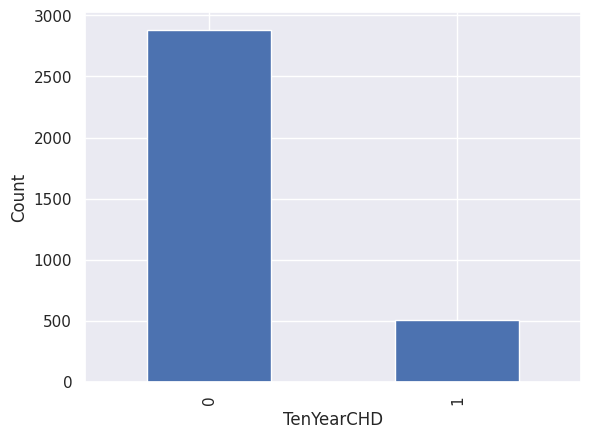

In [ ]:
#Plotting values for y_train
chd_plot=y_train.value_counts().plot(kind='bar')
plt.xlabel('TenYearCHD')
plt.ylabel('Count')
plt.show()

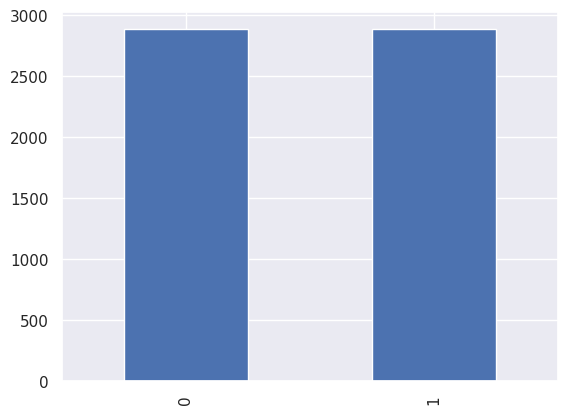

In [ ]:
#Using SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X_train_clean, y_train)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

Accuracy with Logistic Regression: accuracy score: 66.75%
              precision    recall  f1-score   support

           0       0.92      0.66      0.77       710
           1       0.29      0.70      0.41       138

    accuracy                           0.67       848
   macro avg       0.60      0.68      0.59       848
weighted avg       0.82      0.67      0.71       848



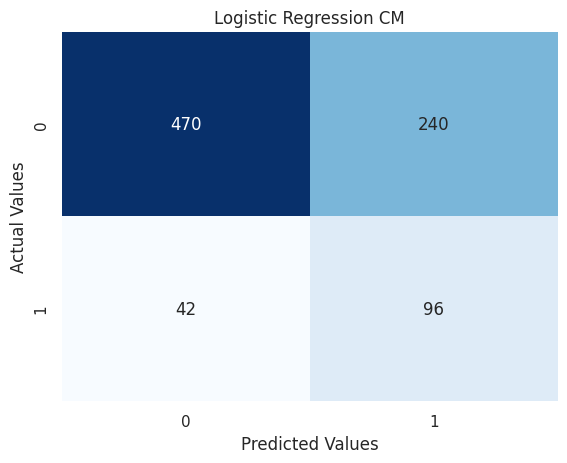

array([[470, 240],
       [ 42,  96]])

In [ ]:
#Training the model
from sklearn.linear_model import LogisticRegression
log_reg_classifier=LogisticRegression(C= 0.1, penalty= 'l2', solver='liblinear')
log_reg_classifier.fit(X_ros, y_ros)
y_pred_log=log_reg_classifier.predict(X_valid_clean)
my_confusion_matrix(y_valid, y_pred_log, 'Logistic Regression CM', 'Accuracy with Logistic Regression:')